# Classifying News Headlines

explains the classification of news headlines as sarcastic and non-sarcastic. We are using the same headlines data as used before.


In [2]:
##import the required libraries and APIs
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Downloading the News Headlines data

In [3]:
!wget --no-check-certificate\
  https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json\
  -o /tmp/headlines.json

In [4]:
##read the the json file using pandas
import pandas as pd

data = pd.read_json('./x1.json')
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [21]:
##store headlines and labels in respective lists
headlines = list(data['headline']) 
labels = list(data['is_sarcastic'])

## Set the parameters

In [64]:
# find the maximum length of the headline
max_length = max([len(line) for line in headlines])
print(max_length)

926


In [65]:
print('total headlines: ', len(headlines))

total headlines:  28619


In [77]:
##define tokenizing and padding parameters
vocab_size = 10000
max_length = max_length
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_token = "<OOV>"

training_percentage = 0.8
training_size = int(len(headlines) * training_percentage)

In [67]:
print(training_size)

22895


## Splitting the training and testing set

In [83]:
# sentences
training_sentences = headlines[0: training_size]
testing_sentences = headlines[training_size: ]

# labels
training_labels = labels[0: training_size]
testing_labels = labels[training_size:]

## Preprocess sentences


In [84]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# training sequences and padding
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# testing sequences and padding
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [85]:
# convert lists into numpy arrays to make it work with TensorFlow 2.x
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Define the neural network model with the following layers:
1. Embedding layer
2. Global Average pooling layer(1D)
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 926, 16)           160000    
                                                                 
 global_average_pooling1d_7   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 24)                408       
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Train the model

Save it into history

In [88]:
num_epochs = 30
batch_size = 128

history = model.fit(training_padded, training_labels,
                    validation_data=(testing_padded, testing_labels),
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
716/716 - 6s - loss: 0.3437 - accuracy: 0.8561 - val_loss: 0.3686 - val_accuracy: 0.8398 - 6s/epoch - 8ms/step
Epoch 2/30
716/716 - 5s - loss: 0.3211 - accuracy: 0.8696 - val_loss: 0.3569 - val_accuracy: 0.8484 - 5s/epoch - 7ms/step
Epoch 3/30
716/716 - 5s - loss: 0.3026 - accuracy: 0.8759 - val_loss: 0.3551 - val_accuracy: 0.8438 - 5s/epoch - 6ms/step
Epoch 4/30
716/716 - 5s - loss: 0.2824 - accuracy: 0.8884 - val_loss: 0.3478 - val_accuracy: 0.8468 - 5s/epoch - 6ms/step
Epoch 5/30
716/716 - 5s - loss: 0.2682 - accuracy: 0.8938 - val_loss: 0.3389 - val_accuracy: 0.8552 - 5s/epoch - 7ms/step
Epoch 6/30
716/716 - 5s - loss: 0.2562 - accuracy: 0.8986 - val_loss: 0.3472 - val_accuracy: 0.8466 - 5s/epoch - 6ms/step
Epoch 7/30
716/716 - 5s - loss: 0.2446 - accuracy: 0.9042 - val_loss: 0.3450 - val_accuracy: 0.8473 - 5s/epoch - 7ms/step
Epoch 8/30
716/716 - 5s - loss: 0.2345 - accuracy: 0.9090 - val_loss: 0.3408 - val_accuracy: 0.8503 - 5s/epoch - 7ms/step
Epoch 9/30
716/716 - 5s 

## Visualise the train & validation accuracy and loss

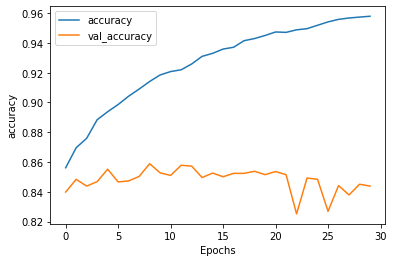

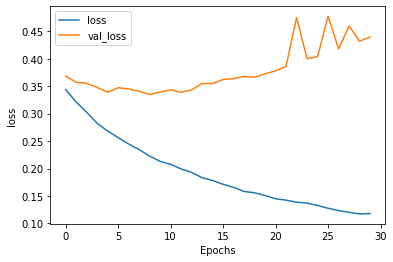

In [89]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Classifying a new sentence

In [93]:
sentence = ["the baby boy fears spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

# prepare the sentences into sequences
sequences = tokenizer.texts_to_sequences(sentence)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

predictions = model.predict(padded_sequences)
print(predictions)

[[0.00073606]
 [0.3567923 ]]
